In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
EPU_daily = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/riskfrom2007.csv', index_col='Unnamed: 0' )
EPU = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/UK_Policy_Data_month.csv', index_col='year' )
date_list = EPU_daily.index.unique().tolist()
# EPU['Date'] =pd.to_datetime(EPU.index)
# EPU =EPU.set_index('Date').sort_index()
EPU

,UK_EPU_Index
year,
2007-01,49.232185
2007-02,53.071934
2007-03,77.055222
2007-04,60.964844
2007-05,66.573944
...,...
2020-02,139.621918
2020-03,281.207275
2020-04,185.352081


In [ ]:
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return (arr)

    results = extract(obj, arr, key)
    return (results)

### API request to retrieve total number of articles published from 2007-01-01 to 2020-05-20


In [ ]:
# Do not run articles count is imported at the of the cell. Run if necessary to update count 
# total = []
# for date in date_list:
#     payload = "\n\n{\n        \"queryString\": \" of AND lastPublishDateTime:>"+date+"T00:00:00Z AND lastPublishDateTime:<"+date+"T23:59:59Z\",\n        \"queryContext\": {\n            \"curations\": [\n                \"ARTICLES\"\n            ]\n        },\n        \"resultContext\": {\n            \"maxResults\": 100,\n            \"offset\": 0,\n            \"aspects\": [\n                \"title\"\n            ],\n            \"contextual\": true,\n            \"highlight\": false,\n            \"suppressDefaultSort\": false\n        }\n    }"
#     url = "https://api.ft.com/content/search/v1"

#     header = {
#     'X-Api-Key': '59cbaf20e3e06d3565778e7b2b473adaf28e4dbbabcd50ed940c6644',
#     'Content-Type': 'application/json',
#     'X-Api-Key': '59cbaf20e3e06d3565778e7b2b473adaf28e4dbbabcd50ed940c6644',
#     'Content-Type': 'text/plain'
#     }

#     response = requests.request("POST", url, headers=headers, data = payload)
#     count = extract_values(response.json(),'indexCount')
#     total.append((count))
total = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/totalfrom2007.csv')
count = total['0'].values.tolist()
len(count)

4933

### API request to retrieve total number of articles related to <i> FEAR, RISK or UNCERTAINTY </i> published from 2007-01-01 to 2020-05-20

In [ ]:
# risk = []
# for date in date_list:
#     payload = "\n\n{\n        \"queryString\": \" (fear OR risk OR uncertain OR uncertainty) AND lastPublishDateTime:>"+date+"T00:00:00Z AND lastPublishDateTime:<"+date+"T23:59:59Z\",\n        \"queryContext\": {\n            \"curations\": [\n                \"ARTICLES\"\n            ]\n        },\n        \"resultContext\": {\n            \"maxResults\": 100,\n            \"offset\": 0,\n            \"aspects\": [\n                \"title\"\n            ],\n            \"contextual\": true,\n            \"highlight\": false,\n            \"suppressDefaultSort\": false\n        }\n    }"

#     url = "https://api.ft.com/content/search/v1"

#     headers = {
#     'X-Api-Key': '59cbaf20e3e06d3565778e7b2b473adaf28e4dbbabcd50ed940c6644',
#     'Content-Type': 'application/json',
#     'X-Api-Key': '59cbaf20e3e06d3565778e7b2b473adaf28e4dbbabcd50ed940c6644',
#     'Content-Type': 'text/plain'
#     }

    
#     response = requests.request("POST", url, headers=headers, data = payload)
#     count = extract_values(response.json(),'indexCount')
#     risk.append((count))


risk = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/riskfrom2007.csv')
keywords = risk['0'].values.tolist()
len(keywords)


4933

In [ ]:
policy = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/policyfrom2007.csv')
policy = policy['0'].values.tolist()

Run below only if API request is executed 

In [ ]:
# count = []
# for i in total:
#     if len(i) == 0:
#         count.append(None)
#     else:
#         count.append(int(i[0]))

# keywords = []
# for i in risk:
#     if len(i) == 0:
#         keywords.append(None)
#     else:
#         keywords.append(int(i[0]))
      

Constructing the index

In [ ]:
df = pd.DataFrame(index=date_list)
df['Date'] =pd.to_datetime(df.index)
df =df.set_index('Date').sort_index().dropna()
# df['weekoftheyear'] = [week.weekofyear for week in df.index]
df['Count'] = count
df['Risk'] = keywords
df['Policy'] = policy
df = df.dropna()
df = df.groupby(pd.Grouper(freq='D')).sum()
df = df.drop(df.tail(1).index)
df['Ratio_risk'] = df['Risk']/df['Count']
df['Ratio_policy'] = df['Policy']/df['Count']

Ratio_risk = df['Ratio_risk']
average_risk = (Ratio_risk).mean()
Ratio_policy = df['Ratio_policy']
average_policy = (Ratio_policy).mean()
df['EU'] = df.Ratio_risk*100/average_risk
df['EPU'] = df.Ratio_policy*100/average_policy

df.EPU.fillna(value=100, inplace=True)
df.Count.fillna(value=df.Count.mean(), inplace=True)
# month = EPU.UK_EPU_Index.values
# df['UK_month_EPU'] = month
df1 = df[-185:]

In [ ]:
df1

,Count,Risk,Policy,Ratio_risk,Ratio_policy,EU,EPU,pandas_SMA_4
Date,,,,,,,,
2020-01-01,43.0,16.0,11,0.372093,0.255814,135.966667,98.988386,NaN
2020-01-02,89.0,27.0,12,0.303371,0.134831,110.854846,52.173654,NaN
2020-01-03,143.0,35.0,23,0.244755,0.160839,89.436116,62.237453,NaN
2020-01-04,16.0,4.0,23,0.250000,1.437500,91.352604,556.247238,NaN
2020-01-05,66.0,16.0,4,0.242424,0.060606,88.584344,23.451794,NaN
...,...,...,...,...,...,...,...,...
2020-06-29,106.0,40.0,13,0.377358,0.122642,137.890724,47.456696,139.406959
2020-06-30,119.0,40.0,39,0.336134,0.327731,122.827031,126.817054,141.061852
2020-07-01,140.0,47.0,34,0.335714,0.242857,122.673497,93.974689,140.377814


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


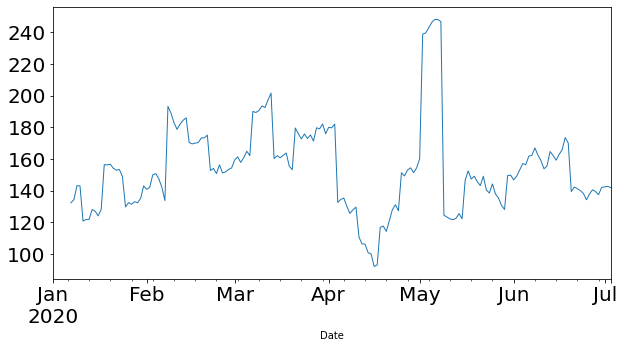

In [ ]:
# df1['EPU'].plot(figsize=(10,5), linewidth=1, fontsize=20);
df1['pandas_SMA_4'] = df1['EPU'].rolling(window=7).mean()
df1['pandas_SMA_4'].plot(figsize=(10,5), linewidth=1, fontsize=20);

# plt.savefig('/content/gdrive/My Drive/Research/Images/FT_EPU_month.png')

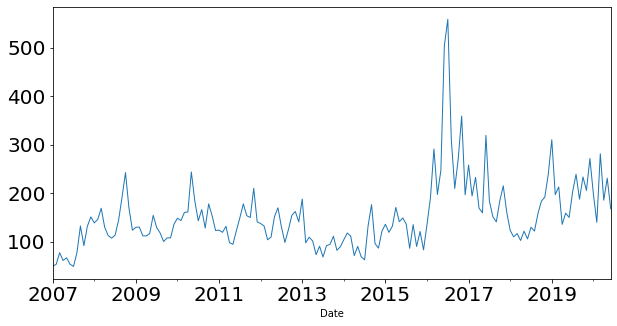

In [ ]:
df['UK_month_EPU'].plot(figsize=(10,5), linewidth=1, fontsize=20);
plt.savefig('/content/gdrive/My Drive/Research/Images/EPU_month.png')

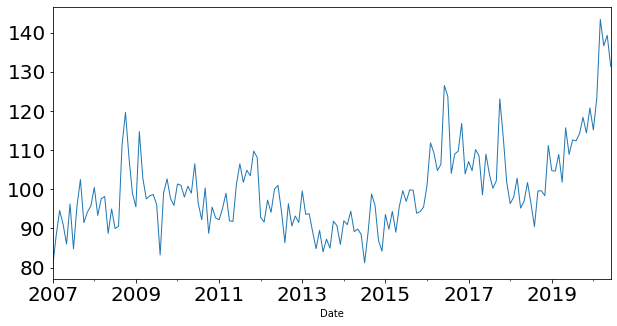

In [ ]:
df['EU'].plot(figsize=(10,5), linewidth=1, fontsize=20);
plt.savefig('/content/gdrive/My Drive/Research/Images/FT_EU_month.png')

In [ ]:
count = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/ITA_total.csv', index_col='year' )
epu = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/ITA_EPU.csv', index_col='year' )
eu = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/ITA_EU.csv', index_col='year' )
Europe_Policy_Uncertainty_Data = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/Europe_Policy_Uncertainty_Data.csv', index_col = 'year')
epu['Date'] = pd.to_datetime(epu.index)
epu =epu.set_index('Date').sort_index()

epu['total'] = count['count'].tolist()
epu['epu_ratio'] = epu['count']/epu['total']
epu_average = epu['count'].sum()/epu['total'].sum()
epu['EPU'] = epu['epu_ratio']*100/epu_average
epu['ITA_EPU'] = Europe_Policy_Uncertainty_Data['ITA_EPU'].tolist()

In [ ]:
compare = pd.DataFrame(index=df.index)
compare['UK'] = df['UK_month_EPU']
compare['ITA'] = epu['ITA_EPU'].values

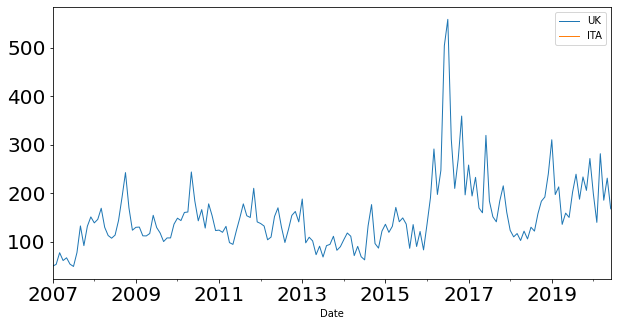

In [ ]:
compare[['UK','ITA']].plot(figsize=(10,5), linewidth=1, fontsize=20)

In [ ]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

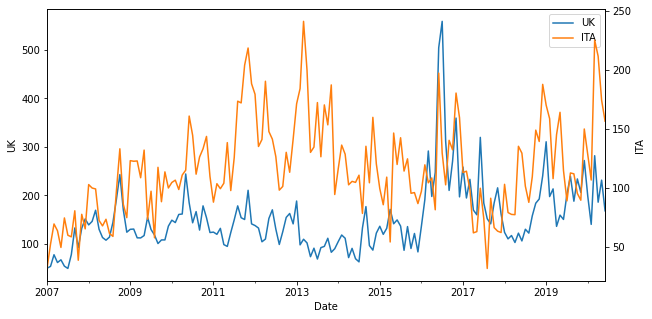

In [ ]:
plot_multi(compare, figsize=(10, 5))
plt.savefig('/content/gdrive/My Drive/Research/Images/ITA_UK_month.png')

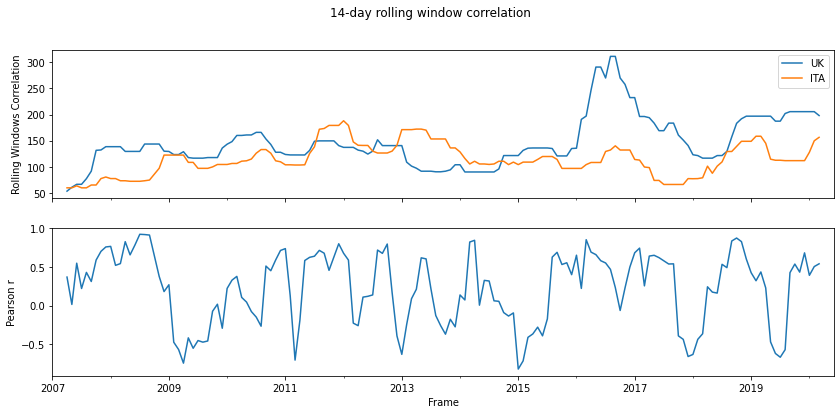

In [ ]:
# Set window size to compute moving window synchrony.
r_window_size = 7
# Interpolate missing data.
# df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = compare['UK'].rolling(window=r_window_size, center=True).corr(compare['ITA'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
compare[['UK','ITA']].rolling(window=7,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Rolling Windows Correlation')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("14-day rolling window correlation")
plt.savefig('/content/gdrive/My Drive/Research/Images/ITA_UK_corr_month.png')

In [ ]:
from scipy.stats import pearsonr


In [ ]:
corr, _ = pearsonr(compare['UK'], compare['ITA'])

In [ ]:
rolling_r.dropna()

Date
2007-04-30    0.368011
2007-05-31    0.014873
2007-06-30    0.547453
2007-07-31    0.220797
2007-08-31    0.428484
                ...   
2019-11-30    0.432185
2019-12-31    0.680771
2020-01-31    0.390843
2020-02-29    0.503750
2020-03-31    0.539679
Freq: M, Length: 156, dtype: float64

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/ft2020all.csv')
# df[df['Date'] == 'yesterday']['Date']
df.loc[df['Date'] == 'yesterday', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '5 hours ago', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '2 hours ago', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '4 hours ago', 'Date'] = '2020-07-14'
df['Date'] =pd.to_datetime(df.Date)
df =df.dropna().set_index('Date').sort_index()
arts = df.Article.tolist()
texts = []
for text in arts:
  texts.append(text.lower())

In [ ]:
eu_count = []
for text in texts:
  if ('risk'or'fear'or'uncertainty') in text:
    eu_count.append(1)
  else:
    eu_count.append(0)

In [ ]:
count = []
for i in range(len(df)):
  count.append(1)

In [ ]:
epu_count = []
for text in texts:
  if (('risk'or'uncertainty'or'fear') and ('policy'or'monetary'or'central bank'or'quantitative easing'or'governament'or'law'or'inflation'or'recession'or'crisis')) in text:
    epu_count.append(1)
  else:
    epu_count.append(0)

In [ ]:
df['eu'] = eu_count
df['epu'] = epu_count
df['count'] = count
df.head()

,Unnamed: 0,Title,Article,eu,epu,count
Date,,,,,,
2020-01-01,0,"Hello, Robot: machines designed for comfort — ...",In the 1930s there were two kinds of robot sto...,0,0,1
2020-01-01,24,ADHD app: game theory,"For parents with young children, video games c...",0,0,1
2020-01-01,25,The EU needs to learn the language of power,More than three years have passed since EU lea...,1,1,1
2020-01-01,26,Harry Potter at 40: would he be a financial wi...,"Fans of Harry Potter, immortalised in fiction ...",0,0,1
2020-01-01,27,South Korean export decline slows on China shi...,South Korean exports marked the smallest decli...,0,0,1


In [ ]:
epu = df.groupby('Date').sum()
# epu = epu.drop(index='2020-03-19')
epu.head()

,Unnamed: 0,eu,epu,count
Date,,,,
2020-01-01,903,17,9,43
2020-01-02,7395,16,21,86
2020-01-03,29126,26,15,142
2020-01-04,4584,3,2,16
2020-01-05,20538,12,15,63


In [ ]:
epu['epu_ratio'] = epu['epu']/epu['count']
epu_average = epu['epu'].sum()/epu['count'].sum()
epu['EPU'] = epu['epu_ratio']*100/epu_average

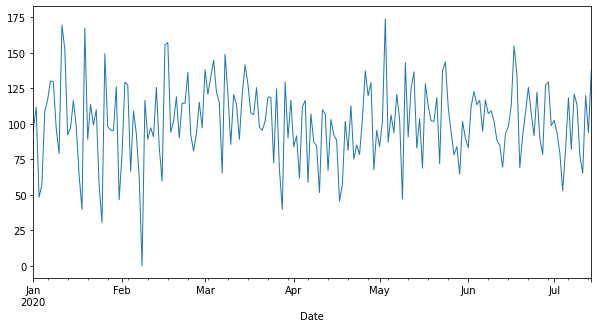

In [ ]:
epu['EPU'].plot(figsize=(10,5), linewidth=1, fontsize=10);

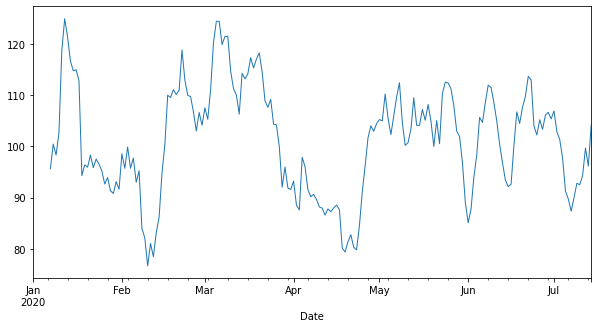

In [ ]:
epu['epu4'] = epu['EPU'].rolling(window=7).mean()
epu['epu4'].plot(figsize=(10,5), linewidth=1, fontsize=10);

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Research/Datasets/ft2020all.csv')
# df[df['Date'] == 'yesterday']['Date']
df.loc[df['Date'] == 'yesterday', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '5 hours ago', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '2 hours ago', 'Date'] = '2020-07-14'
df.loc[df['Date'] == '4 hours ago', 'Date'] = '2020-07-14'
df['Date'] =pd.to_datetime(df.Date)
df =df.dropna().set_index('Date').sort_index()
arts = df.Article.tolist()
texts = []
for text in arts:
  texts.append(text.lower())
  eu_count = []
for text in texts:
  if ('risk'or'fear'or'uncertainty') in text:
    eu_count.append(1)
  else:
    eu_count.append(0)
count = []
for i in range(len(df)):
  count.append(1)
epu_count = []
for text in texts:
  if (('risk'or'uncertainty'or'fear') and ('policy'or'monetary'or'central bank'or'quantitative easing'or'governament'or'law'or'inflation'or'recession'or'crisis')) in text:
    epu_count.append(1)
  else:
    epu_count.append(0)
df['eu'] = eu_count
df['epu'] = epu_count
df['count'] = count
epu = df.groupby('Date').sum()
# epu = epu.drop(index='2020-03-19')
epu['epu_ratio'] = epu['epu']/epu['count']
epu_average = epu['epu'].sum()/epu['count'].sum()
epu['EPU'] = epu['epu_ratio']*100/epu_average